In [156]:
print("all ok")

all ok


In [157]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: c:\Users\CS\Desktop\LLMOps\automated-research-report-generation


In [158]:
from research_and_analyst.utils.model_loader import ModelLoader

In [159]:
model_loader = ModelLoader()

{"timestamp": "2025-10-26T04:45:02.748505Z", "level": "warning", "event": "OPENAI_API_KEY is missing from environment"}
{"timestamp": "2025-10-26T04:45:02.748505Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-26T04:45:02.748505Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-26T04:45:02.748505Z", "level": "info", "event": "ASTRA_DB_API_ENDPOINT loaded from environment"}
{"timestamp": "2025-10-26T04:45:02.748505Z", "level": "info", "event": "ASTRA_DB_APPLICATION_TOKEN loaded from environment"}
{"timestamp": "2025-10-26T04:45:02.764127Z", "level": "info", "event": "ASTRA_DB_KEYSPACE loaded from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-26T04:45:02.802821Z", "level": "info", "event": "YAML config loaded"}


In [160]:
llm=model_loader.load_llm()

{"provider": "google", "model": "gemini-2.0-flash", "timestamp": "2025-10-26T04:45:02.813416Z", "level": "info", "event": "Loading LLM"}


In [161]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [162]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [163]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#health

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),
Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [164]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [165]:
Analyst(
    name="CS",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='CS', role='genai eng', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [166]:
analyst.name

'Dr. Chloe Davis'

In [167]:
analyst.role

'AI Regulatory Affairs Specialist'

In [168]:
analyst.affiliation

'Global Health Organization'

In [169]:
print(analyst.persona)

Name: Dr. Chloe Davis
Role: AI Regulatory Affairs Specialist
Affiliation: Global Health Organization
Description: Focuses on the regulatory challenges and opportunities presented by generative AI in drug development and clinical trials. Concerned with establishing clear guidelines and standards for the use of AI in healthcare to ensure patient safety and data privacy.



In [170]:
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [171]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [172]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [173]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [174]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [175]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [176]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}
    

In [177]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. David Chen', role='Healthcare Economist', affiliation='Harvard University', description='Analyzes healthcare costs, market trends, and the economic impact of healthcare regulations. Motivated by improving efficiency and affordability in the healthcare system.')]}

In [178]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [179]:
def should_continue(state):
    feedback = (state.get("human_analyst_feedback") or "").strip().lower()
    if feedback and feedback not in ["", "none", "skip", "done", "continue"]:
        return "create_analyst"
    return END


In [180]:
# def should_continue(state):
#     """ Return the next node to execute """
#     human_analyst_feedback = state.get("human_analyst_feedback",None)
#     if human_analyst_feedback:
#         return "create_analyst"

In [181]:
from IPython.display import Image, display

## First Workflow

In [182]:
builder = StateGraph(GenerateAnalystsState)

In [183]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [184]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,
                        ["create_analyst",
                        END])

In [185]:
memory = MemorySaver()

In [186]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

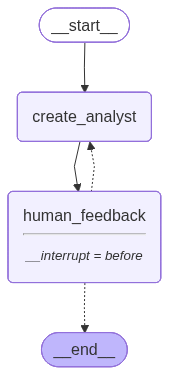

In [187]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [188]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [189]:
max_analysts = 4

In [190]:
thread =  {"configurable":{"thread_id":1}}

In [191]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  
            
        

Name: Alice Chen
Affiliation: Independent AI Lab
Role: AI Research Scientist
Description: Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Large Financial Institution
Role: Enterprise Architect
Description: Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.
--------------------------------------------------
Name: Charlie Davis
Affiliation: Non-profit AI Ethics Organization
Role: AI Ethics Consultant
Description: Prioritizes the ethical implications of using Langgraph.

In [192]:
state = graph.get_state(thread)

In [193]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', 

In [194]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'),
  Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.'),
  Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', description='Pr

In [195]:
state.next

('human_feedback',)

In [196]:
# memory.storage

In [197]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0b2268-d121-6f00-bfff-4b502746e1fd': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-26T04:45:09.376179+00:00\xa2id\xd9$1f0b2268-d121-6f00-bfff-4b502746e1fd\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.6258086396978424\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0b2268-d130-68be-8000-d9bf3898cd52': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2025-10-26T04:45:09.382163+00:00\xa2id\xd9$1f0b2268-d130-68be-8000-d9bf3898cd52\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.8198040784008626\xa5topic\xd9300000000000000000000000000000002.0.8198040784008626\xacmax_analysts\xd9300000000000000000000000000000002.0.8198040784008626\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.8198040784008626\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\xd

In [198]:
# import msgpack

# for thread_id, ns_dict in memory.storage.items():
#     print(f"\n Thread ID: {thread_id}")
    
#     # ns_dict = defaultdict(dict, {'': {...}})
#     for ns, ckpts in ns_dict.items():
#         print(f"  Namespace: '{ns}'")
        
#         # ckpts = dict of {checkpoint_id: (packed_values, packed_metadata, parent_id)}
#         for ckpt_id, (packed_values, packed_metadata, parent_id) in ckpts.items():
#             print(f"    Checkpoint ID: {ckpt_id}")
            
#             # Decode msgpack binary
#             values = msgpack.unpackb(packed_values[1], raw=False)
#             meta = msgpack.unpackb(packed_metadata[1], raw=False)
            
#             print(f"    Values keys: {list(values.keys())}")
#             print(f"    Parent ID: {parent_id}")
#             print(f"    Metadata: {meta}")
#             print("-" * 80)


In [199]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b2268-edda-62b0-8001-2ed1953f262f'}}

In [200]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b2268-f3a3-6571-8002-482e46ea45bb'}}

In [201]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Alice Chen
Affiliation: Independent AI Lab
Role: AI Research Scientist
Description: Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent workflows and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Large Financial Institution
Role: Enterprise Architect
Description: Concerned with the practical benefits of Langgraph for enterprise applications. His focus is on how Langgraph can improve the reliability, scalability, and maintainability of AI-powered systems in a business context. He is also interested in the cost savings and ROI that Langgraph can provide.
--------------------------------------------------
Name: Charlie Davis
Affiliation: Non-profit AI Ethics Organization
Role: AI Ethics Consultant
Description: Prioritizes the ethical implications of using Langgraph.

In [202]:
state = graph.get_state(thread)

In [203]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."), Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."), Analy

In [204]:
state.next

('human_feedback',)

In [205]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."),
  Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."),
  Analyst(name='Priya

In [206]:
# import msgpack

# def get_all_checkpoints(memory, thread_id="1"):
#     """Return all checkpoints in chronological order for a thread."""
#     checkpoints = []
#     ns_dict = memory.storage.get(thread_id, {})
#     if "" not in ns_dict:
#         return []

#     for ckpt_id, (packed_values, packed_meta, parent_id) in ns_dict[""].items():
#         values = msgpack.unpackb(packed_values[1], raw=False)
#         meta = msgpack.unpackb(packed_meta[1], raw=False)
#         checkpoints.append({
#             "id": ckpt_id,
#             "parent": parent_id,
#             "topic": values.get("topic"),
#             "feedback": values.get("human_analyst_feedback"),
#             "analyst_count": len(values.get("analysts", [])),
#             "analysts": [a.model_dump() for a in values.get("analysts", [])],
#             "step": meta.get("step"),
#             "created_at": values.get("ts", None)
#         })
#     return checkpoints

# # Fetch all
# history = get_all_checkpoints(memory)

# # Sort by step (to get chronological order)
# history = sorted(history, key=lambda x: (x["step"] or 0))

# # Display neatly
# for h in history:
#     print(f"\nSTEP {h['step']} | CHECKPOINT {h['id']}")
#     print(f"Parent: {h['parent']}")
#     print(f"Topic: {h['topic']}")
#     print(f"Feedback: {h['feedback']}")
#     print(f"Analysts generated: {h['analyst_count']}")
#     print("-"*100)


In [207]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [208]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [209]:
# 3) Update feedback at the 'human_feedback' node
#    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b2269-1449-6da9-8006-7c8abd9a7cda'}}

In [210]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)


()


In [211]:
analysts = final_state.values.get('analysts')

In [212]:
analysts

[Analyst(name='Ava Chen', role='Startup CTO', affiliation='InnovateAI', description="Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures."),
 Analyst(name='Dr. Ben Carter', role='Enterprise AI Architect', affiliation='GlobalTech Solutions', description="Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments."),
 Analyst(name='Priya Sharma', role='AI Research Scientist', affiliation='AI Research Institute', description="Investigates Langgraph's research potential, particularly its modularity and flexibility for experimenting with novel agent architectur

In [213]:
for analyst in analysts:
    print(f"Name: {analyst.name}")
    print(f"Affiliation: {analyst.affiliation}")
    print(f"Role: {analyst.role}")
    print(f"Description: {analyst.description}")
    print("-" * 50) 

Name: Ava Chen
Affiliation: InnovateAI
Role: Startup CTO
Description: Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups, emphasizing its potential to accelerate development cycles and reduce time to market. Concerned with ease of integration, scalability, and cost-effectiveness for early-stage ventures.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: GlobalTech Solutions
Role: Enterprise AI Architect
Description: Evaluates Langgraph's suitability for complex enterprise applications, focusing on its ability to manage multi-agent workflows, ensure reliability, and integrate with existing enterprise systems. Prioritizes security, compliance, and governance in large-scale deployments.
--------------------------------------------------
Name: Priya Sharma
Affiliation: AI Research Institute
Role: AI Research Scientist
Description: Investigates Langgraph's research potential, particularly its modularity and flexibi

In [214]:
"The benefits of adopting LangGraph as an agent framework"

'The benefits of adopting LangGraph as an agent framework'

In [215]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


Either you can use Google Serper API or use duckduckgo

In [216]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs[0].page_content[:500])

Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".


== Characteristics ==
In 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:

On-demand self-service: "A consumer ca


In [217]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="The benefits of adopting AWS Cloud").load()
print(docs)

[Document(metadata={'title': 'Cloud computing', 'summary': 'Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n', 'source': 'https://en.wikipedia.org/wiki/Cloud_computing'}, page_content='Cloud computing is "a paradigm for enabling network access to a scalable and elastic pool of shareable physical or virtual resources with self-service provisioning and administration on-demand," according to ISO. It is commonly referred to as "the cloud".\n\n\n== Characteristics ==\nIn 2011, the National Institute of Standards and Technology (NIST) identified five "essential characteristics" for cloud systems. Below are the exact definitions according to NIST:\n\nOn-demand self-service: "A consumer can unilaterally provision computing capabilities, such as server time and network storage, as neede

In [218]:
from langchain_community.document_loaders import WikipediaLoader
docs = WikipediaLoader(query="AWS").load()
print(docs[0].page_content[:500])

c:\Users\CS\Desktop\LLMOps\automated-research-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\CS\Desktop\LLMOps\automated-research-report-generation\.venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Amazon Web Services, Inc. (AWS) is a subsidiary of Amazon that provides on-demand cloud computing platforms and APIs to individuals, companies, and governments, on a metered, pay-as-you-go basis.
Clients often use this in combination with autoscaling (a process that allows a client to use more computing in times of high application usage, and then scale down to reduce costs when there is less traffic). These cloud computing web services provide various services related to networking, compute, st


In [219]:
from langchain_community.utilities import WikipediaAPIWrapper

In [220]:
wiki = WikipediaAPIWrapper(doc_content_chars_max=4000)
docs = wiki.run("The benefits of adopting LangGraph as an agentic framework")
print(docs)

Page: Semantic Web
Summary: The Semantic Web, sometimes known as Web 3.0, is an extension of the World Wide Web through standards set by the World Wide Web Consortium (W3C). The goal of the Semantic Web is to make Internet data machine-readable.
To enable the encoding of semantics with the data, technologies such as Resource Description Framework (RDF) and Web Ontology Language (OWL) are used. These technologies are used to formally represent metadata. For example, ontology can describe concepts, relationships between entities, and categories of things. These embedded semantics offer significant advantages such as reasoning over data and operating with heterogeneous data sources.
These standards promote common data formats and exchange protocols on the Web, fundamentally the RDF. According to the W3C, "The Semantic Web provides a common framework that allows data to be shared and reused across application, enterprise, and community boundaries." The Semantic Web is therefore regarded as

## Second Workflow

In [221]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [222]:
from dotenv import load_dotenv
load_dotenv()
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [223]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)

In [224]:
tavily_search.invoke("langgraph")

[{'title': 'LangGraph overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.We will commonly use LangChain components throughout the',
  'score': 0.9314689},
 {'title': 'What is LangGraph? - Analytics Vidhya',
  'url': 'https://www.analyticsvidhya.com/blog/2024/07/langgraph-revolutionizing-ai-agent/',
  'content': 'To sum up, LangGraph is a major advancement in the development of AI agents. It enables developers to push the limits of what’s possible with AI agents by eliminating the shortcomin

In [225]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 

In [226]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [227]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [228]:
print(analyst.persona)

Name: David Lee
Role: AI Product Manager
Affiliation: ProductAI Inc.
Description: Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.



In [229]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: David Lee\nRole: AI Product Manager\nAffiliation: ProductAI Inc.\nDescription: Analyzes Langgraph\'s impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understa

In [230]:
'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Michael Chen\nRole: Business Strategy Consultant\nAffiliation: FutureTech Consulting\nDescription: Michael analyzes the strategic implications of adopting Langgraph for businesses. He focuses on how the framework can drive innovation, support digital transformation initiatives, and align with long-term business goals.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you

In [231]:
def generation_question(state:InterviewState):
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]
    messages = state["messages"]
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)]+messages)
    
    #returen the question through state
    return {"messages":[question]}

In [232]:
analyst

Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.")

In [233]:
class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

In [234]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],"messages":[HumanMessage(content="hi do the proper search according to the experties")]}

In [235]:
state

{'max_num_turns': 2,
 'context': [],
 'analyst': Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions."),
 'interview': '',
 'section': [],
 'messages': [HumanMessage(content='hi do the proper search according to the experties', additional_kwargs={}, response_metadata={})]}

In [236]:
result = generation_question(state)

In [237]:
result

{'messages': [AIMessage(content='Okay, here we go.\n\nHi David, my name is Anya Sharma, and I\'m an analyst focusing on the practical applications of new AI technologies. I\'m particularly interested in Langgraph and its potential to reshape AI product development.\n\nGiven your role at ProductAI Inc., you\'re likely seeing firsthand how Langgraph is being used. To start, could you give me a concrete example of a problem in AI product development that Langgraph solves particularly well, and how it compares to previous approaches? I\'m looking for something beyond the general "agent orchestration" benefit – a specific use case where it really shines.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--562b6cc8-b0f6-43d4-8af0-d6f9a75766b1-0', usage_metadata={'input_tokens': 235, 'output_tokens': 129, 'total_tokens': 364, 'input_token_details': {'

In [238]:
print(result["messages"][0].content)

Okay, here we go.

Hi David, my name is Anya Sharma, and I'm an analyst focusing on the practical applications of new AI technologies. I'm particularly interested in Langgraph and its potential to reshape AI product development.

Given your role at ProductAI Inc., you're likely seeing firsthand how Langgraph is being used. To start, could you give me a concrete example of a problem in AI product development that Langgraph solves particularly well, and how it compares to previous approaches? I'm looking for something beyond the general "agent orchestration" benefit – a specific use case where it really shines.


In [239]:
from langchain_core.messages import get_buffer_string

In [240]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [241]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [242]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [243]:
result = search_web(state)

In [244]:
print(result["context"][0])

<Document href="https://www.cohorte.co/blog/unleashing-the-power-of-langgraph-an-introduction-to-the-future-of-ai-workflows"/>
```
graph = graph_builder.compile() user_input = "Hi there!"  state = {"messages": [user_input]} print(result["messages"])
```

Congratulations! You've built your first chatbot using LangGraph.

## Why You Should Care: Real Business Benefits

LangGraph isn’t just for hobby projects. It’s built to be the engine behind reliable, stateful, LLM-powered applications that have real-world value. Businesses can use it to create AI systems that: [...] ##### 3. Human-in-the-Loop

Sometimes, even the smartest AI agents need a little human guidance. LangGraph allows you to easily integrate human input into the process. You can pause your AI agent, have a person check its plan, tweak things if needed, and then continue the workflow. This makes LangGraph perfect for creating reliable AI systems that need to be trusted in business settings—where AI can do most of the work, bu

In [245]:
def search_wikipedia(state:InterviewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    print("*******************************")
    print(search_query)
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
    

In [246]:
state = {"max_num_turns":2,"context":[],"analyst":analyst,"interview":"","section":[],'messages': [AIMessage(content="Hello, my name is Alex Thompson, and I'm an analyst interested in understanding the strategic implications of adopting Langgraph for businesses. I'm particularly keen on how this framework can drive innovation and support digital transformation initiatives. Thank you for taking the time to speak with me today, Michael. \n\nTo start, could you explain what Langgraph is and why it's becoming a significant consideration for businesses looking to innovate?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 224, 'total_tokens': 303, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CPRmMT7ufhFyYLhMtNpeguI9W2y6O', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--827b799b-ccb9-422c-a444-402d7ddc4550-0', usage_metadata={'input_tokens': 224, 'output_tokens': 79, 'total_tokens': 303, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [247]:
result = search_wikipedia(state)

*******************************
search_query='Langgraph framework benefits for business innovation'


In [248]:
search_docs = WikipediaLoader(query='Langgraph framework benefits',load_all_available_meta=True).load()

In [249]:
search_docs

[]

In [250]:
result

{'context': ['']}

In [251]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [252]:
def generate_answer(state:InterviewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}
    

how many analyst we were doing to be create:
4

max_trun:2

means if atleast 2 expert are giving ans then we can save the result.

In [253]:
def route_messages(state: InterviewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [254]:
def save_interview(state: InterviewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [255]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [256]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}


In [257]:
interview_builder = StateGraph(InterviewState)

In [258]:
interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [259]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [260]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")


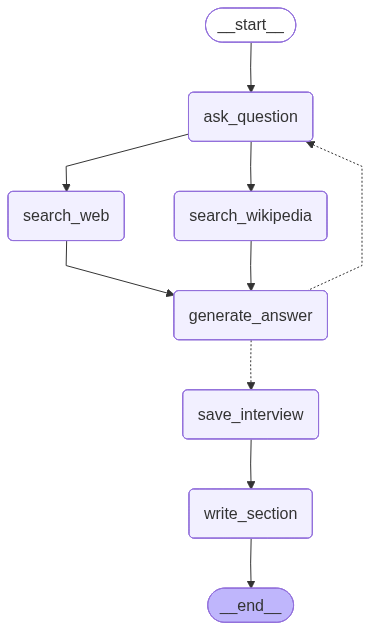

In [261]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

In [262]:
analyst

Analyst(name='David Lee', role='AI Product Manager', affiliation='ProductAI Inc.', description="Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.")

In [263]:
analyst.persona

"Name: David Lee\nRole: AI Product Manager\nAffiliation: ProductAI Inc.\nDescription: Analyzes Langgraph's impact on AI product development, focusing on its ability to streamline agent orchestration, improve model performance, and enhance user experiences. Concerned with product differentiation, competitive advantage, and market adoption of Langgraph-powered solutions.\n"

In [264]:
thread = {"configurable": {"thread_id": "1"}}

In [265]:
from IPython.display import Markdown

In [266]:
messages = [HumanMessage("So you said you were writing an article on Langchain?")]

In [267]:
interview = interview_graph.invoke({"analyst": analyst, "messages": messages, "max_num_turns": 2}, thread)

*******************************
search_query='LangGraph solves in AI product development'
*******************************
search_query='LangGraph reactive agents customer service chatbot hallucination loops interruptions debugging'


In [268]:
Markdown(interview['sections'][0])

## LangGraph: Revolutionizing AI Product Development with Agent Orchestration

### Summary

LangGraph, a library built on top of LangChain, is emerging as a game-changing framework for AI product development, particularly in building sophisticated, stateful, multi-agent applications powered by Large Language Models (LLMs) [1, 2]. It addresses the limitations of linear chains and simple prompts by enabling developers to orchestrate intelligent, dynamic agents capable of solving complex, multi-step tasks [5]. LangGraph facilitates the creation of AI systems that can reason, act, and provide context-aware responses, marking a significant shift from traditional assistant frameworks [14].

One of the key advantages of LangGraph is its ability to manage state across execution cycles, ensuring deterministic execution and transparency in debugging [1, 3]. Unlike LangChain's agent-centric model, where LLMs dynamically decide the next step, LangGraph introduces explicit control over the execution flow, making AI workflow development more reliable and scalable [3]. This is achieved through a graph-based architecture that utilizes nodes (functions or LangChain runnable items) and edges (execution and data flow) to define workflows [1].

LangGraph's architecture supports dynamic reasoning loops, allowing agents to "think, act, and observe" before finalizing an answer [14]. This iterative process enables agents to analyze questions, execute actions using tools or APIs, assess the results, and repeat the process until a satisfactory answer is generated [14]. This ReAct paradigm (Reasoning and Acting) allows AI agents to reason and act based on real-time inputs, breaking down complex tasks into smaller, manageable steps [15, 16]. Furthermore, LangGraph allows for the integration of human intervention in the loop, which is helpful for debugging or modifying graph states [15].

The ability to visualize the graph structure serves as a valuable debugging tool, especially as systems grow in complexity [16]. Moreover, LangGraph's streaming capability enables the creation of real-time, interactive experiences [16]. By providing a structured, scalable, and resilient framework, LangGraph empowers developers to build more reliable, production-ready AI solutions [5].

### Sources

[1] https://medium.com/pythoneers/building-ai-agent-systems-with-langgraph-9d85537a6326
[2] https://www.scalablepath.com/machine-learning/langgraph
[3] https://www.keyvalue.systems/blog/ai-application-development-from-langchain-to-langgraph/
[4] https://www.langchain.com/langgraph
[5] https://medium.com/@techie_chandan/why-langgraph-is-the-future-of-ai-workflows-and-what-you-can-do-with-it-deep-dive-into-e1fd7b5f31fc
[6] https://en.wikipedia.org/wiki/Applications_of_artificial_intelligence
[7] https://en.wikipedia.org/wiki/Legal_expert_system
[8] https://en.wikipedia.org/wiki/List_of_unsolved_problems_in_mathematics
[9] https://en.wikipedia.org/wiki/Deep_learning
[10] https://en.wikipedia.org/wiki/Wayne_Chang
[11] https://en.wikipedia.org/wiki/Timeline_of_computing_2020%E2%80%93present
[12] https://en.wikipedia.org/wiki/Carbon_(programming_language)
[13] https://en.wikipedia.org/wiki/Wikipedia
[14] https://medium.com/@piyushkashyap045/mastering-langgraph-the-ultimate-guide-to-ai-systems-rag-agents-and-tools-ceca33090ef5
[15] https://www.linkedin.com/pulse/building-next-gen-customer-service-agent-using-langgraph-singh-ryeuc
[16] https://medium.com/@tejpal.abhyuday/why-your-ai-chatbot-needs-to-become-an-ai-agent-langgraph-tutorial-beginner-94e8e728f80b

## third Workflow

In [269]:
from typing_extensions import TypedDict
from typing import List, Annotated
import operator
class ResearchGraphState(TypedDict):
    topic: str # Research topic
    max_analysts: int # Number of analysts
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    sections: Annotated[list, operator.add] # Send() API key
    introduction: str # Introduction for the final report
    content: str # Content for the final report
    conclusion: str # Conclusion for the final report
    final_report: str # Final report
    
# class InterviewState(MessagesState):
#     max_num_turns: int # Number turns of conversation
#     context: Annotated[list, operator.add] # Source docs
#     analyst: Analyst # Analyst asking questions
#     interview: str # Interview transcript
#     sections: list # Final key we duplicate in outer state for Send() API

In [270]:
from langgraph.types import Send

In [271]:
def initiate_all_interviews(state:ResearchGraphState):
    """ This is the "map" step where we run each interview sub-graph using Send API """ 
    
    #check if human feedback
    human_analyst_feedback=state.get('human_analyst_feedback')
    if human_analyst_feedback:
        # Return to create_analysts
        return "create_analysts"
    
    # Otherwise kick off interviews in parallel via Send() API
    else:
        topic = state["topic"]
        return [Send("conduct_interview", {"analyst": analyst,
                                        "messages": [HumanMessage(
                                            content=f"So you said you were writing an article on {topic}?"
                                        )
                                                ]}) for analyst in state["analysts"]]


In [272]:
# def write_report(state:ResearchGraphState):
#     """_summary_

#     Args:
#         state (ResearchGraphState): _description_
#     """
#     pass

In [273]:
report_writer_instructions = """You are a technical writer creating a report on this overall topic: 

{topic}
    
You have a team of analysts. Each analyst has done two things: 

1. They conducted an interview with an expert on a specific sub-topic.
2. They write up their finding into a memo.

Your task: 

1. You will be given a collection of memos from your analysts.
2. Think carefully about the insights from each memo.
3. Consolidate these into a crisp overall summary that ties together the central ideas from all of the memos. 
4. Summarize the central points in each memo into a cohesive single narrative.

To format your report:
 
1. Use markdown formatting. 
2. Include no pre-amble for the report.
3. Use no sub-heading. 
4. Start your report with a single title header: ## Insights
5. Do not mention any analyst names in your report.
6. Preserve any citations in the memos, which will be annotated in brackets, for example [1] or [2].
7. Create a final, consolidated list of sources and add to a Sources section with the `## Sources` header.
8. List your sources in order and do not repeat.

[1] Source 1
[2] Source 2

Here are the memos from your analysts to build your report from: 

{context}"""

In [274]:
def write_report(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    system_message = report_writer_instructions.format(topic=topic, context=formatted_str_sections)    
    report = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Write a report based upon these memos.")]) 
    return {"content": report.content}

In [275]:
intro_conclusion_instructions = """You are a technical writer finishing a report on {topic}

You will be given all of the sections of the report.

You job is to write a crisp and compelling introduction or conclusion section.

The user will instruct you whether to write the introduction or conclusion.

Include no pre-amble for either section.

Target around 100 words, crisply previewing (for introduction) or recapping (for conclusion) all of the sections of the report.

Use markdown formatting. 

For your introduction, create a compelling title and use the # header for the title.

For your introduction, use ## Introduction as the section header. 

For your conclusion, use ## Conclusion as the section header.

Here are the sections to reflect on for writing: {formatted_str_sections}"""

In [276]:
def write_introduction(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    intro = llm.invoke([instructions]+[HumanMessage(content=f"Write the report introduction")]) 
    return {"introduction": intro.content}

In [277]:
def write_conclusion(state: ResearchGraphState):
    # Full set of sections
    sections = state["sections"]
    topic = state["topic"]

    # Concat all sections together
    formatted_str_sections = "\n\n".join([f"{section}" for section in sections])
    
    # Summarize the sections into a final report
    
    instructions = intro_conclusion_instructions.format(topic=topic, formatted_str_sections=formatted_str_sections)    
    conclusion = llm.invoke([instructions]+[HumanMessage(content=f"Write the report conclusion")]) 
    return {"conclusion": conclusion.content}

In [278]:
def finalize_report(state: ResearchGraphState):
    """ The is the "reduce" step where we gather all the sections, combine them, and reflect on them to write the intro/conclusion """
    # Save full final report
    content = state["content"]
    if content.startswith("## Insights"):
        content = content.strip("## Insights")
    if "## Sources" in content:
        try:
            content, sources = content.split("\n## Sources\n")
        except:
            sources = None
    else:
        sources = None

    final_report = state["introduction"] + "\n\n---\n\n" + content + "\n\n---\n\n" + state["conclusion"]
    if sources is not None:
        final_report += "\n\n## Sources\n" + sources
    return {"final_report": final_report}

In [279]:
# Add nodes and edges 
builder = StateGraph(ResearchGraphState)
builder.add_node("create_analysts", create_analyst)
builder.add_node("human_feedback", human_feedback)
builder.add_node("conduct_interview", interview_builder.compile())
builder.add_node("write_report",write_report)
builder.add_node("write_introduction",write_introduction)
builder.add_node("write_conclusion",write_conclusion)
builder.add_node("finalize_report",finalize_report)

# Logic
builder.add_edge(START, "create_analysts")
builder.add_edge("create_analysts", "human_feedback")
builder.add_conditional_edges("human_feedback", initiate_all_interviews, ["create_analysts", "conduct_interview"])
builder.add_edge("conduct_interview", "write_report")
builder.add_edge("conduct_interview", "write_introduction")
builder.add_edge("conduct_interview", "write_conclusion")
builder.add_edge(["write_conclusion", "write_report", "write_introduction"], "finalize_report")
builder.add_edge("finalize_report", END)


In [280]:
memory = MemorySaver()

In [281]:
graph = builder.compile(interrupt_before=['human_feedback'], checkpointer=memory)

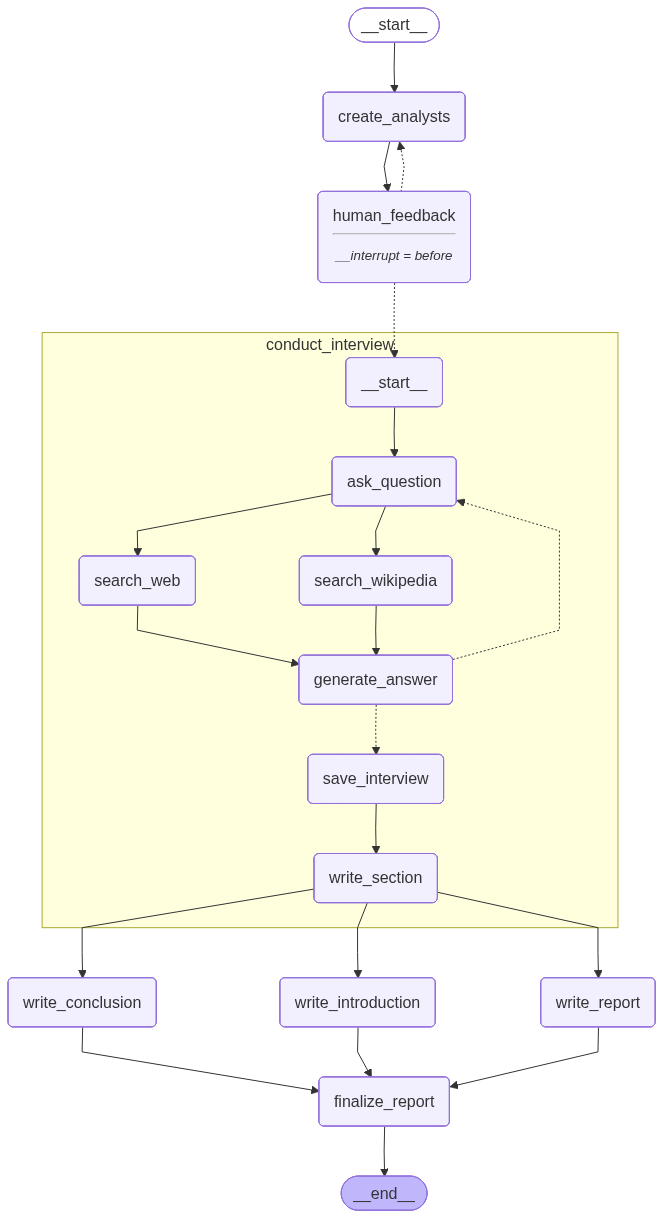

In [282]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [283]:
max_analysts = 3

In [284]:
topic = "How can generative help us to play the cricket?"

In [285]:
topic = "How can generative AI accelerate drug discovery?"

In [286]:
thread = {"configurable": {"thread_id": "1"}}

In [287]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Anya Sharma
Affiliation: Independent Consultancy
Role: AI Drug Discovery Consultant
Description: Focuses on the practical applications of generative AI in streamlining drug discovery workflows, with a keen interest in reducing development timelines and costs. She is motivated by the potential to accelerate the availability of life-saving treatments but is concerned about the hype and unrealistic expectations surrounding AI capabilities.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: Center for AI Safety
Role: AI Safety Researcher
Description: Dedicated to identifying and mitigating potential risks associated with using generative AI in drug discovery. He is particularly concerned about the possibility of generating harmful or ineffective drug candidates and the ethical implications of AI-driven drug development.
--------------------------------------------------
Name: Dr. Chloe Davis
Affiliation: Tech Company X
Role: Generative AI Algorit

In [288]:
graph.update_state(thread, {"human_analyst_feedback":"along with the genetive ai in future tell me the future of indian team"}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b228b-7b80-6e04-8002-7159e6d90c2e'}}

In [294]:
# Run the graph until the first interruption
for event in graph.stream({"topic":topic,"max_analysts":max_analysts}, thread, stream_mode="values"):
    analysts = event.get('analysts', '')
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50) 

Name: Dr. Anya Sharma
Affiliation: Global Pharma Consulting
Role: AI Drug Discovery Consultant
Description: Focuses on how generative AI can optimize lead identification and compound synthesis, with a particular interest in applications for personalized medicine and challenges related to data privacy and bias in AI algorithms.
--------------------------------------------------
Name: Dr. Rahul Singh
Affiliation: Indian Sports Authority
Role: AI in Sports Performance Analyst
Description: Analyzes the potential of AI to revolutionize player training, talent scouting, and strategic decision-making in Indian sports, particularly cricket, while also addressing concerns about fair play and ethical considerations.
--------------------------------------------------
Name: Dr. Kenji Tanaka
Affiliation: Tech Ethics Council
Role: Generative AI Ethics Advisor
Description: Dedicated to ensuring the responsible development and deployment of generative AI in drug discovery, addressing concerns about da

Name: Dr. Anya Sharma
Affiliation: Independent Consultant
Role: AI Drug Discovery Consultant
Description: Focuses on the practical applications of generative AI in streamlining drug discovery workflows, reducing costs, and accelerating timelines. Concerned with ethical considerations, data privacy, and ensuring equitable access to AI-driven drug development.
--------------------------------------------------
Name: Dr. Ben Carter
Affiliation: Tech Startup X
Role: Generative AI Algorithm Developer
Description: Specializes in developing novel generative AI algorithms for drug design and optimization. Motivated by pushing the boundaries of AI technology and creating more effective and targeted therapies. Concerned with the computational challenges and the need for robust validation of AI-generated drug candidates.
--------------------------------------------------
Name: Dr. Chloe Davis
Affiliation: Pharma Corp Y
Role: Drug Discovery Research Scientist
Description: Focuses on target identif

In [295]:
graph.update_state(thread, {"human_analyst_feedback":""}, as_node="human_feedback")

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b22c1-51dc-6c43-800a-d246a6b8a1ac'}}

In [296]:
graph.get_state(thread).next

('conduct_interview', 'conduct_interview', 'conduct_interview')

In [297]:
# Continue
for event in graph.stream(None, thread, stream_mode="updates"):
    print("--Node--")
    node_name = next(iter(event.keys()))
    print(node_name)

*******************************
search_query='generative AI accelerating drug discovery specific examples bottlenecks overcome'
*******************************
search_query='generative AI bottlenecks in traditional drug discovery'
*******************************
search_query='generative AI applications in drug discovery target identification and hit discovery case studies'
*******************************
search_query='generative AI for de novo drug design'
*******************************
search_query='generative AI for hit identification in drug discovery'
*******************************
search_query='generative AI for drug discovery targeting kinases inflammatory bowel disease'
--Node--
conduct_interview
--Node--
conduct_interview
--Node--
conduct_interview
--Node--
write_conclusion
--Node--
write_introduction
--Node--
write_report
--Node--
finalize_report


In [298]:
from IPython.display import Markdown

In [299]:
final_state = graph.get_state(thread)


In [300]:
report = final_state.values.get('final_report')

In [301]:
Markdown(report)

# Generative AI: The Future of Drug Discovery

## Introduction
Generative AI is revolutionizing drug discovery by accelerating timelines, reducing costs, and enabling the design of novel molecules for previously "undruggable" targets. This report explores how generative AI is transforming early-stage research, enabling faster progression from concept to viable drug candidate. We examine how AI is impacting targeted therapies through the design of novel compounds with tailored functional properties. Finally, we highlight AI's role in enhancing precision, reducing timelines and costs, and enabling AI-driven computer-aided drug design, showcasing its potential in addressing unmet medical needs.

---



Generative AI is revolutionizing drug discovery by accelerating timelines, reducing costs, and enabling the design of novel molecules for previously "undruggable" targets [1, 4]. Unlike traditional methods, generative AI can create entirely new molecules tailored to specific disease targets [1]. This technology is particularly impactful in early-stage drug discovery, where it can generate new molecules tailored for specific properties, thereby revolutionizing various aspects of the drug development process [4]. Generative AI's ability to analyze vast datasets and identify complex patterns allows researchers to explore chemical spaces that were previously inaccessible through traditional methods [1, 5].

Generative AI, particularly generative adversarial networks (GANs), is enabling the design of novel compounds with tailored functional properties [4]. GANs consist of a generator and a discriminator, which work together to create synthetic data, such as novel molecules, by learning from real data distributions [6, 7]. Deep learning models, especially GANs and autoencoders, are accelerating *de novo* drug design [1]. Generative AI can develop superior text, concept art, visual art, code, animation, speech, music, and video [3]. For instance, it is possible to synthesize good-quality visual representation using diffusion models [3]. AI models are used in molecular property prediction, molecule generation, virtual screening, and synthesis planning [4].

Several companies are at the forefront of this revolution. For example, Insilico Medicine utilized AI to significantly reduce the time and cost of developing a drug for idiopathic pulmonary fibrosis [1]. Insilico Medicine also announced positive results from Phase I studies of ISM5411, an AI-designed drug for inflammatory bowel disease (IBD) [16]. ISM5411, a novel gut-restricted and PHD-specific inhibitor, was designed and optimized using Insilico's Chemistry42 generative reinforcement learning platform [16]. The AI platform ranked the PHD1/2-HIF1α signaling axis as a top potential target [15]. NVIDIA's BioNeMo platform is also accelerating drug discovery by providing tools to develop and deploy foundation models, enabling scientists to integrate generative AI to reduce or replace experiments [1, 5]. Merck is scaling its internal generative AI platform across its late-phase pipeline to overcome bottlenecks in drug discovery [3]. Small to midsize biopharma companies are also beginning to leverage generative AI, with startups specifically designed to implement these technologies finding success [2]. AION Labs, backed by major pharmaceutical and technology companies, focuses on adopting AI and machine learning in pharmaceutical discovery and development [8]. Generate:Biomedicines specializes in using machine learning to design and optimize proteins for therapeutic applications, securing significant partnerships to further its research [9].

However, the integration of generative AI into drug discovery workflows is not without its challenges. One major hurdle is data quality, as AI models rely on robust and unbiased datasets to generate effective drug candidates [1]. The sheer size of chemical diversity that needs to be searched, combined with the lack of readily available data, poses a significant challenge for generative AI techniques [2]. Furthermore, regulatory uncertainty and the need for cultural and technical shifts within pharmaceutical companies add to the complexity of adopting these new technologies [1]. While challenges such as interpretability and computational demands remain, ongoing research is addressing these issues, paving the way for GANs to play a crucial role in accelerating drug discovery [4]. Generative AI shows promise in IBD care, but concerns about accuracy, consistency, and outdated information highlight the need for expert oversight before clinical integration [17]. AI-driven tools like natural language processing (NLP) are improving clinical trial recruitment by analyzing clinical notes and unstructured data to identify potential participants that might be missed by traditional screening methods [19].

Despite these challenges, generative AI is already demonstrating its potential to accelerate drug discovery. By enabling faster progression from concept to viable drug candidate through AI-powered predictions and simulations, generative AI is poised to revolutionize early-stage research in pharmaceutical companies [6]. AI integration has the potential to hasten the creation of novel treatments, save costs, and improve patient outcomes [5]. Alliances between AI and pharmaceutical companies are increasing and focus on the AI-driven development of drug candidates in a faster and more affordable manner [1].


---

## Conclusion

Generative AI is poised to revolutionize drug discovery by accelerating timelines, reducing costs, and enabling the design of novel molecules for previously "undruggable" targets. Its impact spans early-stage research, target identification, and lead optimization. Companies like Insilico Medicine and NVIDIA are pioneering AI-driven platforms, while generative adversarial networks (GANs) are enabling the creation of compounds with tailored properties. Despite challenges like data quality and interpretability, small to midsize biopharma companies and specialized startups are successfully leveraging generative AI. As AI continues to advance, its integration promises to hasten the creation of novel treatments and improve patient outcomes.

## Sources

[1] https://www.delveinsight.com/blog/generative-ai-drug-discovery-market-impact
[2] https://www.appliedclinicaltrialsonline.com/view/the-evolving-role-of-ai-in-shifting-the-bottleneck-in-early-drug-discovery
[3] https://www.drugtargetreview.com/article/163308/next-generation-drug-design-ai-tackle-undruggable-targets/
[4] https://www.nature.com/articles/d41586-025-00602-5
[5] https://www.reddit.com/r/biotech/comments/1mml2j7/impact_of_aiml_in_different_steps_of_drug/
[6] https://www.intuz.com/blog/drug-discovery-and-development-using-generative-ai
[7] https://bernardmarr.com/how-generative-ai-is-accelerating-drug-discovery/
[8] https://www.ey.com/en_us/insights/life-sciences/how-pharma-can-benefit-from-using-genai-in-drug-discovery
[9] https://www.merck.com/news/merck-expands-innovative-internal-generative-ai-solutions-helping-to-deliver-medicines-to-patients-faster/
[10] https://jcheminf.biomedcentral.com/articles/10.1186/s13321-025-01059-4
[11] https://blogs.nvidia.com/blog/drug-discovery-bionemo-generative-ai/
[12] https://pmc.ncbi.nlm.nih.gov/articles/PMC10879372/
[13] https://www.frontiersin.org/journals/pharmacology/articles/10.3389/fphar.2024.1331062/full
[14] https://en.wikipedia.org/wiki/AION_Labs
[15] https://en.wikipedia.org/wiki/Generate:Biomedicines
[16] https://www.sciencedirect.com/science/article/pii/S135964462400117X
[17] https://pmc.ncbi.nlm.nih.gov/articles/PMC11510778/
[18] https://pmc.ncbi.nlm.nih.gov/articles/PMC11444559/
[19] https://www.sciencedirect.com/science/article/pii/S2949866X24000327
[20] https://communities.springernature.com/posts/using-generative-artificial-intelligence-to-design-a-tissue-restricted-phd-inhibitor-for-ibd-from-the-computer-to-the-clinic
[21] https://www.news-medical.net/news/20250108/AI-designed-drug-shows-promise-for-inflammatory-bowel-disease.aspx
[22] https://pubmed.ncbi.nlm.nih.gov/40348628/
[23] https://pmc.ncbi.nlm.nih.gov/articles/PMC11848901/